In [15]:
### Clustering
import numpy as np
import pandas as pd
import os,re,sys
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline


In [184]:
### Sample data for cluster
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data  # take the Independent features.
y_iris = iris.target

In [185]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [186]:
Xdf=pd.DataFrame(X_iris,columns=iris.feature_names)
Xdf['class']=y_iris

In [187]:
import numpy as np
from math import sqrt, floor

def initialize(ds, k):

    '''
    Create random cluster centroids
    
    Parameters:
    -----------
    ds: ndarray
        Dataset to cluster instances from
    k: int
        The number of clusters
    
    Returns:
    --------
    ndarray
        k centroids as numpy ndarray
    '''

    # Number of attributes in dataset
    n = np.shape(ds)[1]
    
    # The centroids
    centroids = np.mat(np.zeros((k,n)))

    # Create random centroids (get min, max attribute values, randomize in that range)
    for j in range(n):
        min_j = min(ds[:,j])
        range_j = float(max(ds[:,j]) - min_j)
        centroids[:,j] = min_j + range_j * np.random.rand(k, 1)

    # Return centroids as numpy array
    return centroids

import scipy.spatial.distance as metric

def euclidean_dist(A, B):

    '''
    Calculate Euclidean distance between 2 n-dimension points
    
    Parameters:
    -----------
    A: ndarray
        vector of point coordinates to compare
    B: ndarray
        vector of point coordinates to compare
    Returns:
    --------
    float
        calculated Euclidean distance of the 2 vectors
    '''
    
    return metric.euclidean(A, B)
def cluster(ds, k):

    '''
    The k-means clustering algorithm
    
    Parameters:
    -----------
    ds: ndarray
        Dataset to cluster instances from
    k: int
        The number of clusters

    Returns:
    --------
    ndarray
        Resulting centroids after clustering
    ndarray
        Cluster assignments after clustering
    int
        Number of iterations required by clustering algorithm
    ndarray
        Original centroids
    '''

    # Number of rows in dataset
    m = np.shape(ds)[0]

    # Hold the instance cluster assignments
    cluster_assignments = np.mat(np.zeros((m, 2)))

    # Initialize centroids
    cents = initialize(ds, k)
    
    # Preserve original centroids
    cents_orig = cents.copy()
    
    changed = True
    num_iter = 0

    # Loop until no changes to cluster assignments
    while changed:

        changed = False

        # For every instance (row in dataset)
        for i in range(m):

            # Track minimum distance, and vector index of associated cluster
            min_dist = np.inf
            min_index = -1

            # Calculate distances
            for j in range(k):

                dist_ji = euclidean_dist(cents[j,:], ds[i,:])
                if dist_ji < min_dist:
                    min_dist = dist_ji
                    min_index = j

            # Check if cluster assignment of instance has changed
            if cluster_assignments[i, 0] != min_index: 
                changed = True

            # Assign instance to appropriate cluster
            cluster_assignments[i, :] = min_index, min_dist**2

        # Update centroid location
        for cent in range(k):
            points = ds[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
            cents[cent,:] = np.mean(points, axis=0)

        # Count iterations
        num_iter += 1

    # Return important stuff when done
    return cents, cluster_assignments, num_iter, cents_orig

In [204]:
centroids, cluster_assignments, iters, orig_centroids=cluster(X_iris[:,:3],3)

In [205]:
iters

10

In [206]:
finalcluster=pd.DataFrame(cluster_assignments[:,0])
finalcluster.columns=['clusterid']
finalcluster['clusterid']=finalcluster['clusterid'].apply(lambda x : int(x))

In [207]:
finalcluster['label']=y_iris

In [208]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(finalcluster['label'],finalcluster['clusterid']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.12      0.10      0.11        50
           2       0.22      0.26      0.24        50

   micro avg       0.45      0.45      0.45       150
   macro avg       0.45      0.45      0.45       150
weighted avg       0.45      0.45      0.45       150



In [209]:
confusion_matrix(finalcluster['label'],finalcluster['clusterid'])

array([[50,  0,  0],
       [ 0,  5, 45],
       [ 0, 37, 13]], dtype=int64)

In [210]:
#### Clustering K means using sklearn

from scipy.io import arff
import pandas as pd

data = arff.loadarff('D:/hackathon/data/Absenteeism_at_work_AAA/Absenteeism_at_work.arff')
df = pd.DataFrame(data[0])

df.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,b'11.0',b'26.0',7.0,b'3.0',b'1.0',289.0,36.0,13.0,33.0,239554.0,...,b'0.0',1.0,2.0,b'1.0',b'0.0',1.0,90.0,172.0,30.0,4.0
1,b'36.0',b'0.0',7.0,b'3.0',b'1.0',118.0,13.0,18.0,50.0,239554.0,...,b'1.0',1.0,1.0,b'1.0',b'0.0',0.0,98.0,178.0,31.0,0.0
2,b'3.0',b'23.0',7.0,b'4.0',b'1.0',179.0,51.0,18.0,38.0,239554.0,...,b'0.0',1.0,0.0,b'1.0',b'0.0',0.0,89.0,170.0,31.0,2.0
3,b'7.0',b'7.0',7.0,b'5.0',b'1.0',279.0,5.0,14.0,39.0,239554.0,...,b'0.0',1.0,2.0,b'1.0',b'1.0',0.0,68.0,168.0,24.0,4.0
4,b'11.0',b'23.0',7.0,b'5.0',b'1.0',289.0,36.0,13.0,33.0,239554.0,...,b'0.0',1.0,2.0,b'1.0',b'0.0',1.0,90.0,172.0,30.0,2.0


In [215]:
data = pd.read_csv('D:/hackathon/data/Absenteeism_at_work_AAA/Absenteeism_at_work.csv',sep=";")
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [217]:
data2=data.values

In [219]:
data2[:,1:]

array([[ 26.,   7.,   3., ..., 172.,  30.,   4.],
       [  0.,   7.,   3., ..., 178.,  31.,   0.],
       [ 23.,   7.,   4., ..., 170.,  31.,   2.],
       ...,
       [  0.,   0.,   3., ..., 170.,  34.,   0.],
       [  0.,   0.,   4., ..., 170.,  35.,   0.],
       [  0.,   0.,   6., ..., 175.,  25.,   0.]])

In [220]:
# TODO: Import KMeans
from sklearn.cluster import KMeans

# TODO: Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2, random_state=0)

# TODO: use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(data2[:,1:])

# Plot


In [224]:
clustered = pd.concat([data.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

In [225]:
clustered.head()

,index,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,group
0,0,11,26,7,3,1,289,36,13,33,...,1,2,1,0,1,90,172,30,4,1
1,1,36,0,7,3,1,118,13,18,50,...,1,1,1,0,0,98,178,31,0,0
2,2,3,23,7,4,1,179,51,18,38,...,1,0,1,0,0,89,170,31,2,0
3,3,7,7,7,5,1,279,5,14,39,...,1,2,1,1,0,68,168,24,4,1
4,4,11,23,7,5,1,289,36,13,33,...,1,2,1,0,1,90,172,30,2,1


In [228]:
from sklearn.metrics import silhouette_samples, silhouette_score

def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    #cluster_centers = kmeans.cluster_centers_
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg

In [230]:
len(X)

740

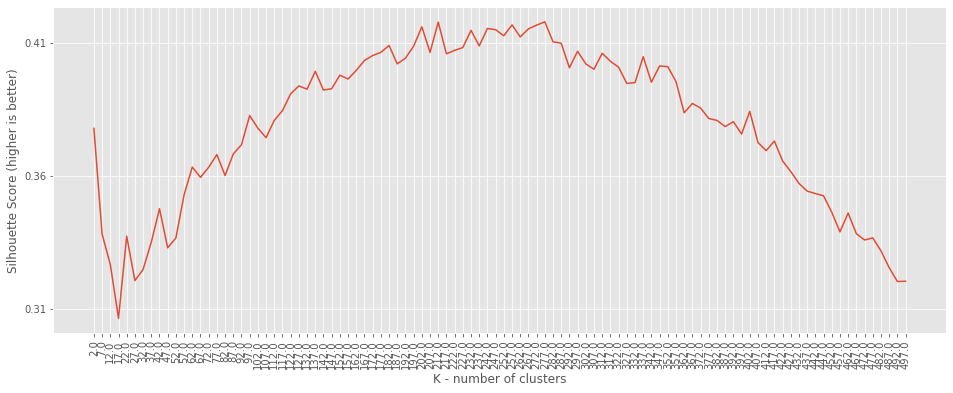

In [242]:
X=data2[:,1:]
# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, 500, 5)

# Calculate error values for all k values we're interested in
errors_per_k = [clustering_errors(k, X) for k in possible_k_values]

#Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.set_xticklabels(xticks, rotation=90)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

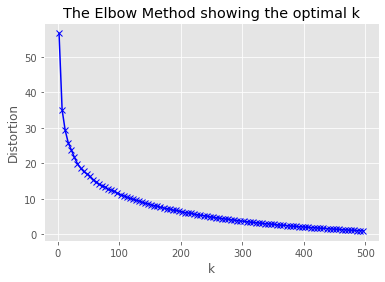

In [234]:
# k means determine k
from scipy.spatial.distance import cdist

distortions = []
K = range(2, 500, 5)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()